In [1]:
import pandas as pd
import numpy as np
from scipy.stats import stats
import matplotlib.pyplot as plt

Down_Samp = pd.read_csv('Down_Sampled.csv',parse_dates=['datetime'])
Reg_Samp = pd.read_csv('Reg_Sampled.csv',parse_dates=['datetime'])

# Down_Samp.columns
Reg_Samp = Reg_Samp.set_index(Reg_Samp['datetime'])
Down_Samp = Down_Samp.set_index(Reg_Samp['datetime'])
# plt.plt()

In [2]:
# plt.figure()
# Valid = 
Reg_Samp_Sel = Reg_Samp.loc[((Reg_Samp['co2_flux'].isnull()==False)&
                        (Reg_Samp['co2_flux'].index.month==7)&
                        (Reg_Samp['co2_flux'].index.day>12)
                        )]
Down_Samp_Sel = Down_Samp.loc[((Down_Samp['co2_flux'].isnull()==False)&
                          (Down_Samp['co2_flux'].index.month==7)&
                          (Down_Samp['co2_flux'].index.day>12)
                          )]
# Down_Samp.index.min()

In [3]:
Temp = Reg_Samp_Sel[['co2_flux','ch4_flux']]
Temp2 = Down_Samp_Sel[['co2_flux','ch4_flux']]
Temp2 = Temp2.rename(columns={'co2_flux':'co2_flux_1hz',
                              'ch4_flux':'ch4_flux_1hz'})
Temp3 = Temp[['co2_flux','ch4_flux']].join(Temp2[['co2_flux_1hz','ch4_flux_1hz']])

In [16]:

Temp4= Temp3[['ch4_flux','ch4_flux_1hz']].dropna()*1e3
print(Temp4.describe())
print(stats.ttest_ind(Temp4['ch4_flux'].values,Temp4['ch4_flux_1hz'].values))


Temp5= Temp3[['co2_flux','co2_flux_1hz']].dropna()
print(Temp5.describe())
print(stats.ttest_ind(Temp5['co2_flux'].values,Temp5['co2_flux_1hz'].values))

         ch4_flux  ch4_flux_1hz
count  319.000000    319.000000
mean    39.590145     39.399897
std     11.167116     11.774948
min      7.011556      8.515977
25%     31.705793     31.033593
50%     40.130433     40.444852
75%     48.307843     47.876630
max     68.343799     70.694836
Ttest_indResult(statistic=0.2093848612301961, pvalue=0.8342148591807327)
         co2_flux  co2_flux_1hz
count  706.000000    706.000000
mean    -1.194538     -1.195691
std      1.485263      1.481493
min     -4.544352     -4.548428
25%     -2.329876     -2.332361
50%     -1.398609     -1.395868
75%      0.144835      0.155267
max      2.325714      2.466699
Ttest_indResult(statistic=0.014603863813846074, pvalue=0.9883502827338556)


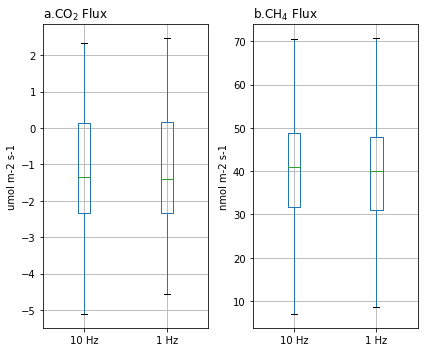

In [15]:

import matplotlib as mpl
mpl.rcParams["mathtext.default"] = 'regular'

fig,ax=plt.subplots(1,2,figsize = (6,5))
Temp3[['co2_flux','co2_flux_1hz']].boxplot(ax=ax[0])
(Temp3[['ch4_flux','ch4_flux_1hz']]*1e3).boxplot(ax=ax[1])
ax[0].set_title(r'a.${CO_2}$ Flux ',loc='left')
ax[1].set_title(r'b.${CH_4}$ Flux ',loc='left')
ax[0].set_ylabel('umol m-2 s-1')
ax[1].set_ylabel('nmol m-2 s-1')
ax[0].set_xticklabels(['10 Hz','1 Hz'])
ax[1].set_xticklabels(['10 Hz','1 Hz'])
plt.tight_layout()
plt.savefig('Frequency.jpg',dpi=600)

In [6]:
# Reg_Samp_Sel2 = Reg_Samp.loc[Reg_Samp['ch4_flux'].isnull()==False]

# Reg_Samp_Sel2.columns